In [ ]:
#Exploratory data analyis(EDA) analyis i s summarise the main funationality of the data even display in graphic form. 
# statistical model(next wohi ha) used or not but the EDA is compulsory to analysis the data beofre we do the formal modeling(actual analyis)


#Descriptive statistics
#DescriptionA descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information,
#while descriptive statistics is the process of using and analysing those statistics
# boxplot(ida me first ch me orha tha) is easily describe the summary 


#Groupby in python
#groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. 
#The abstract definition of grouping is to provide a mapping of labels to group names. 

# correlation
#    measure to what extent two variables are inter dependent

# statistics correlation
#In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.
#In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related


#Analysis of variance(ANOVA)
#DescriptionAnalysis of variance is a collection of statistical models and their associated estimation procedures 
#used to analyze the differences among group means in a sample.
import pandas as pd
url='https://data.cityofchicago.org/resource/jcxq-k9xf.csv'
df=pd.read_csv(url)
df

In [ ]:
#Descriptive statistics
# we panddas decribe funcation is used to analyis the data and showw  mean medain mode etc
df.describe()

In [ ]:
# vlaue_counts() function is used to summaries the categorical data
a = df["community_area_name"].value_counts()
a
# its means if any city come 5 time they will show 5 but here bychance every city 1 time so they 1

In [ ]:
# Main 3 library for show visualization matplotlib(show the normal graph). matplotlib.pyplot(show the scatter graph) and seaborn(show the boxplot and balur sekrch) 

# describe the summaries data into graph for easily under standing for BOXPLOT is bes
# for Pandas is use for maniplute the data for visulaztion we matplotlib and seaborn
# seaborn is used for boxplot

import seaborn as sns
sns.boxplot(x="community_area_name",   y="per_capita_income_",   data=df)

# in this they box plot by seeing this i can be analyse the data but here  community_area_name have alot of values thats why they alot of boxplot in very small size

In [ ]:
# we can be use scatter plot(that show the each point)
# scatter plot show betweeen ttwo variable(independent(predicator) varialble on x axis, and dependent(target) variable on y axis)


import matplotlib.pyplot as plt

plt.scatter(x=df["community_area_name"],   y=df["per_capita_income_"])

In [ ]:
#Groupby in python
# Make the groups of the data that have relation between then in pandas they have function groupby()
# can be applied only catergorical variable(low,mid,high)
# group into categories single or multiple variables

#here we take different data this data is perfect for apply these function
import pandas as pp
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df1=pp.read_csv(path)
df1


In [ ]:
df2=df1[["drive-wheels","body-style","price"]]
grp=df2.groupby(["drive-wheels","body-style"], as_index=False).mean()
grp
# they make the group group the 4wd , fwd and rwd
# mtlb is 4wd kib jo car thi thi jin ka bbody stylr hatchback tha in ki privce ka mean ly loyia is sub sb ka ly k group bna dyia ta next jb hum analisation ki trf jy to asni ho

In [ ]:
# we can be convert into table for better understanding for this we use pivot table
df_pivot= grp.pivot(  index='drive-wheels' ,  columns="body-style")
df_pivot

# INDEX ko hmesha ' ' me show krwom otherwise error dy ga

In [ ]:
# we can be show this data into graph by using matplotlib
plt.pcolor(df_pivot)
plt.colorbar() # they color bar numbering
#plt.show()
# the x_axis show the body style and yaxis body wheels

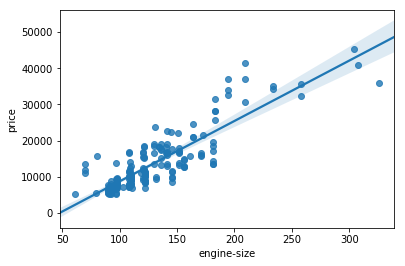

In [60]:
# correlation
#    measure to what extent two variables are inter dependent
#     e.g cancer -> smoking
 #correlation does not imply causation
    
# let us we disscuss on our data core relation between engine size and price
import seaborn as sns
b= sns.regplot(x="engine-size", y="price", data=df1)

# you can seen in group engine size and price have core relation between them as the size increase price is also increasing(they show postive linear relation between two varaibles)
#thet show the postive relaship  because both increasing similarly
# seaborn map is also known heat map

In [ ]:
# this bot column show the negative relation between them
b= sns.regplot(x="highway-mpg", y="price", data=df1)

In [ ]:
# week relationship between two column
b= sns.regplot(x="peak-rpm", y="price", data=df1)

#therefore peak-rpm not use for pridiction

In [88]:
# statistics correlation
# measure the strength of relation between two feature(using method pearsonr() correlation they take correlation cofficient and p-value)
# when correlation cofficient value close to +1 it have large positive realtion when -1 large negative relationshipn when 0 no relationship
# when p value p<0.001 strong certainty when p<0.05 moderate certainty when p<0.1 weak certainty when p>0.1 no certainty

# strong correlation
#   when cofficient between 1 to -1
#   p value less than 0.001

import scipy.stats as stat
c=stat.pearsonr(df1['horsepower'] , df1["price"] )
c
# so they have strong relationship p value is in negative and cofficient is 0.8

# we know `for scientifics computing we use three library(pandas, numpy, scipy)
#         for virtualisation  we use         (matplotlib, matplotlip.pylib, seaborn)
#          for  machine learning  we use     (tensorflow, skitlearn, statsmodels)

(0.8095745670036559, 6.36905742825998e-48)

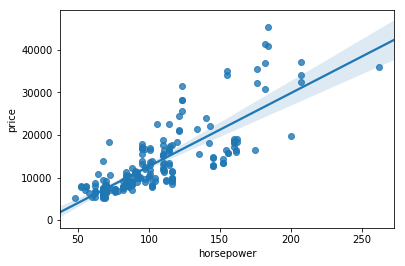

In [77]:
# we can be seen by seaborn
sns.regplot(x="horsepower", y= "price" ,  data=df1)

# they show they strong relation

In [86]:
##Analysis of variance(ANOVA)
 #          difference among the group means of the data and comparsion
    
# in this example mean price of the different vichele comparsion
# for this purpose ANOVA(use for find correlation between different categorical variables) function is using

# ANOVA return two values 
# (1) F_test score (variation between sample group mean / variation within sample)   ida me tests me last test tha ye
# (2) P-value (that show the confiddence interval)
# ANOVA test perform by f_oneway()  method

import scipy.stats as stat
a= df1[["make" , "price"]]
result = stat.f_oneway((a.groupby(["make"])).get_group("honda")["price"] ,(a.groupby(["make"])).get_group("subaru")["price"] )
result

# f test score is less than 1 and p value larger than 0.05
# so there is week relation
# if f test value is great and p value less than 0.05 then stron relationship

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)